# Application of BigData Part 1

## Model building

In [20]:
import pandas as pd
import numpy as np
import sklearn
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.ensemble import RandomForestClassifier

import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [3]:
df_train_nan=pd.read_csv('df_dummies_nan.csv')

In [5]:
df_train_nan.drop('Unnamed: 0', axis=1, inplace=True)
df_train_nan

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,-5.199338,1,-5.199338,0.387078,-0.385935,-0.163824,-0.411534,-0.148584,1.656254,0.862544,...,0,0,0,0,0,0,1,0,1,0
1,-3.889639,0,0.724973,0.634851,0.751333,0.154718,0.584984,-0.322932,0.183741,-0.533016,...,0,0,0,0,0,1,0,0,1,0
2,-3.819250,0,-5.199338,-0.920412,-1.629992,-2.023292,-1.505747,1.404533,-0.659948,-1.652486,...,0,0,0,0,0,0,1,0,1,0
3,-3.774033,0,0.724973,1.959536,-0.151121,0.408805,-0.170185,0.138444,0.965881,-0.934131,...,0,0,0,0,0,1,0,0,1,0
4,-3.744563,0,1.558482,-0.479432,-1.010382,-1.209626,-0.744694,0.522099,0.917551,0.746904,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51068,3.657373,0,0.724973,0.147316,0.586473,0.454224,0.391137,0.839121,0.330343,-1.427066,...,0,1,0,0,0,0,0,0,1,0
51069,3.802346,0,-5.199338,0.634851,-0.137177,0.546894,0.062770,0.839121,0.178960,1.584354,...,0,1,0,0,0,0,0,0,1,0
51070,3.876035,1,-5.199338,0.634851,-0.081638,-0.278302,-0.170185,-0.461215,-0.380326,1.404533,...,0,0,0,0,0,0,1,0,0,1
51071,3.962013,0,-5.199338,0.147316,0.526417,-0.236799,0.391137,0.434861,-1.567979,-1.589728,...,0,0,0,0,0,1,0,0,1,0


In [6]:
column_nan=df_train_nan.columns.tolist()

In [7]:
def stratified_split(df, target, val_percent=0.2):
    '''
    Function to split a dataframe into train and validation sets, while preserving the ratio of the labels in the target variable
    Inputs:
    - df, the dataframe
    - target, the target variable
    - val_percent, the percentage of validation samples, default 0.2
    Outputs:
    - train_idxs, the indices of the training dataset
    - val_idxs, the indices of the validation dataset
    '''
    classes=list(df[target].unique())
    train_idxs, val_idxs = [], []
    for c in classes:
        idx=list(df[df[target]==c].index)
        np.random.shuffle(idx)
        val_size=int(len(idx)*val_percent)
        val_idxs+=idx[:val_size]
        train_idxs+=idx[val_size:]
    return train_idxs, val_idxs


train_idxs, val_idxs = stratified_split(df_train_nan, 'TARGET', val_percent=0.25)

val_idxs, test_idxs = stratified_split(df_train_nan[df_train_nan.index.isin(val_idxs)], 'TARGET', val_percent=0.5)

In [9]:
train_df = df_train_nan[df_train_nan.index.isin(train_idxs)]

X_train = train_df[column_nan].values
Y_train = train_df[['TARGET']].values
print('Retrieved Training Data')

val_df = df_train_nan[df_train_nan.index.isin(val_idxs)]
X_val = val_df[column_nan].values
Y_val = val_df[['TARGET']].values
print('Retrieved Validation Data')

test_df = df_train_nan[df_train_nan.index.isin(test_idxs)]
X_test = test_df[column_nan].values
Y_test = test_df[['TARGET']].values
print('Retrieved Test Data')

Retrieved Training Data
Retrieved Validation Data
Retrieved Test Data


In [11]:
#store data, all in numpy arrays
training_data = {'X_train':X_train,'Y_train':Y_train,
                'X_val': X_val,'Y_val':Y_val,
                'X_test': X_test,'Y_test':Y_test}

In [12]:
clf = RandomForestClassifier(n_jobs=None,random_state=27,
                       verbose=1)
clf.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished


RandomForestClassifier(random_state=27, verbose=1)

In [13]:
predicted_labels = clf.predict(training_data['X_test'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [14]:
accuracy_score(training_data['Y_test'], predicted_labels)

1.0

In [15]:
params = {
    'n_estimators'      : range(100,500,50),
    'max_depth'         : [8, 9, 10, 11, 12],
    'max_features': ['auto'],
    'criterion' :['gini']
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = clf, param_grid = params, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))


Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 16.5min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 19.7min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 23.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 25.2min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 28.6min
[Parallel(n_jobs=-1)]: Done 173 tasks      | elapsed: 31

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=27, verbose=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [8, 9, 10, 11, 12],
                         'max_features': ['auto'],
                         'n_estimators': range(100, 500, 50)},
             scoring='f1_micro', verbose=10)

In [25]:
print("Best parameters set found on development set:")
print()
print(gsearch1.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Y_test, gsearch1.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 12, 'max_features': 'auto', 'n_estimators': 400}

Grid scores on development set:

0.947 (+/-0.027) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 100}
0.945 (+/-0.021) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 150}
0.942 (+/-0.019) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
0.942 (+/-0.018) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 250}
0.942 (+/-0.019) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 300}
0.939 (+/-0.015) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 350}
0.937 (+/-0.012) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 400}
0.935 (+/-0.010) for {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 450}
0.9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5913
           1       1.00      1.00      1.00       470

    accuracy                           1.00      6383
   macro avg       1.00      1.00      1.00      6383
weighted avg       1.00      1.00      1.00      6383




[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:    1.1s finished


## XBoost

In [38]:
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost.sklearn import XGBClassifier
import seaborn as sns

In [45]:
#allow logloss and classification error plots for each iteraetion of xgb model
def plot_compare(metrics,eval_results,epochs):
    for m in metrics:
        test_score = eval_results['val'][m]
        train_score = eval_results['train'][m]
        rang = range(0, epochs)
        plt.rcParams["figure.figsize"] = [6,6]
        plt.plot(rang, test_score,"c", label="Val")
        plt.plot(rang, train_score,"orange", label="Train")
        title_name = m + " plot"
        plt.title(title_name)
        plt.xlabel('Iterations')
        plt.ylabel(m)
        lgd = plt.legend()
        plt.show()
        
def fitXgb(sk_model, training_data=training_data,epochs=300):
    print('Fitting model...')
    sk_model.fit(training_data['X_train'], training_data['Y_train'].reshape(training_data['Y_train'].shape[0],))
    print('Fitting done!')
    train = xgb.DMatrix(training_data['X_train'], label=training_data['Y_train'])
    val = xgb.DMatrix(training_data['X_val'], label=training_data['Y_val'])
    params = sk_model.get_xgb_params()
    metrics = ['mlogloss','merror']
    params['eval_metric'] = metrics
    store = {}
    evallist = [(val, 'val'),(train,'train')]
    xgb_model = xgb.train(params, train, epochs, evallist,evals_result=store,verbose_eval=100)
    print('-- Model Report --')
    print('XGBoost Accuracy: '+str(accuracy_score(sk_model.predict(training_data['X_test']), training_data['Y_test'])))
    print('XGBoost F1-Score (Micro): '+str(f1_score(sk_model.predict(training_data['X_test']),training_data['Y_test'],average='micro')))
    plot_compare(metrics,store,epochs)
    features = [column_nan]
    f, ax = plt.subplots(figsize=(10,5))
    plt.show()

In [41]:
#initial model
xgb1 = XGBClassifier(learning_rate=0.1,
                    n_estimators=500,
                    max_depth=5,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

Fitting model...
Fitting done!
[0]	val-mlogloss:1.79370	val-merror:0.00000	train-mlogloss:1.79347	train-merror:0.00000
[100]	val-mlogloss:0.00015	val-merror:0.00000	train-mlogloss:0.00015	train-merror:0.00000
[200]	val-mlogloss:0.00004	val-merror:0.00000	train-mlogloss:0.00004	train-merror:0.00000
[299]	val-mlogloss:0.00003	val-merror:0.00000	train-mlogloss:0.00003	train-merror:0.00000
-- Model Report --
XGBoost Accuracy: 1.0
XGBoost F1-Score (Micro): 1.0


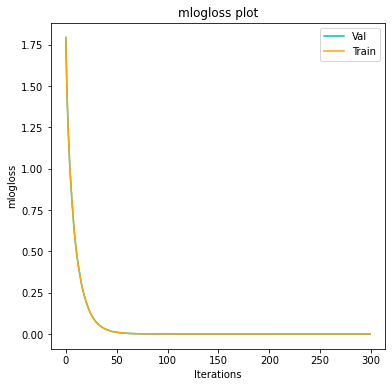

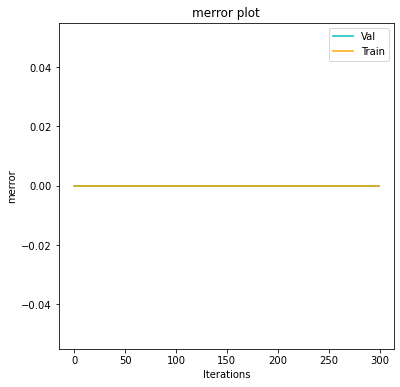

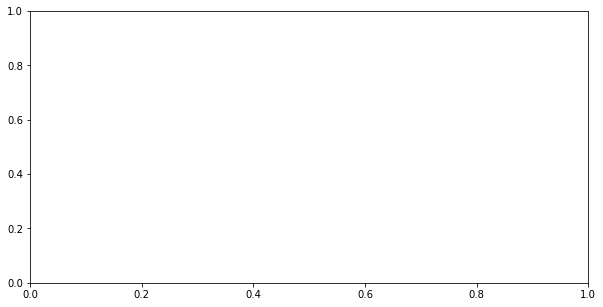

In [46]:
fitXgb(xgb1, training_data)

In [47]:
def getTrainScores(gs):
    results = {}
    runs = 0
    for x,y in zip(list(gs.cv_results_['mean_test_score']), gs.cv_results_['params']):
        results[runs] = 'mean:' + str(x) + 'params' + str(y)
        runs += 1
    best = {'best_mean': gs.best_score_, "best_param":gs.best_params_}
    return results, best

In [52]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
#metrics to consider: f1_micro, f1_macro, roc_auc_ovr
gsearch1 = GridSearchCV(estimator = xgb1, param_grid = param_test1, scoring='f1_micro',n_jobs=-1,verbose = 10, cv=5)
gsearch1.fit(X_train, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed: 20.4min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed: 31.9min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed: 53.8min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 96.0min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 116.5min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 147.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 156.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 156.9min finished
//anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.8, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=5, min_child_weight=1,
                                     missing=nan, monotone_constraints='()',
                                     n_estimators=500, n_jobs=4, nthread=4,
                                     num_class=9, num_parallel_tree=1,
                                     objective='multi:softmax', random_state=27,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=None, seed=27,
                                     subsampl

In [57]:
print("Best parameters set found on development set:")
print()
print(gsearch1.best_params_)
print()
print("Grid scores on development set:")
print()
means = gsearch1.cv_results_['mean_test_score']
stds = gsearch1.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, gsearch1.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = Y_test, gsearch1.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Best parameters set found on development set:

{'max_depth': 3, 'min_child_weight': 1}

Grid scores on development set:

1.000 (+/-0.000) for {'max_depth': 3, 'min_child_weight': 1}
1.000 (+/-0.000) for {'max_depth': 3, 'min_child_weight': 3}
1.000 (+/-0.000) for {'max_depth': 3, 'min_child_weight': 5}
1.000 (+/-0.000) for {'max_depth': 5, 'min_child_weight': 1}
1.000 (+/-0.000) for {'max_depth': 5, 'min_child_weight': 3}
1.000 (+/-0.000) for {'max_depth': 5, 'min_child_weight': 5}
1.000 (+/-0.000) for {'max_depth': 7, 'min_child_weight': 1}
1.000 (+/-0.000) for {'max_depth': 7, 'min_child_weight': 3}
1.000 (+/-0.000) for {'max_depth': 7, 'min_child_weight': 5}
1.000 (+/-0.000) for {'max_depth': 9, 'min_child_weight': 1}
1.000 (+/-0.000) for {'max_depth': 9, 'min_child_weight': 3}
1.000 (+/-0.000) for {'max_depth': 9, 'min_child_weight': 5}

Detailed classification report:

The model is trained on the full development set.
The scores are computed on the full evaluation set.

          

Fitting model...
Fitting done!
[0]	val-mlogloss:1.79381	val-merror:0.00000	train-mlogloss:1.79390	train-merror:0.00000
[100]	val-mlogloss:0.00015	val-merror:0.00000	train-mlogloss:0.00015	train-merror:0.00000
[200]	val-mlogloss:0.00004	val-merror:0.00000	train-mlogloss:0.00004	train-merror:0.00000
[299]	val-mlogloss:0.00003	val-merror:0.00000	train-mlogloss:0.00003	train-merror:0.00000
-- Model Report --
XGBoost Accuracy: 1.0
XGBoost F1-Score (Micro): 1.0


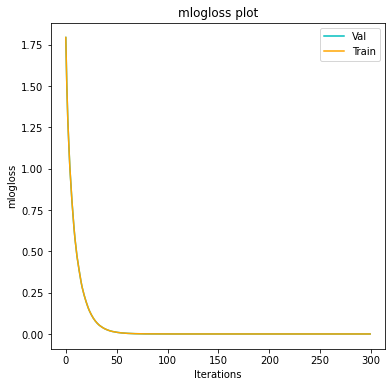

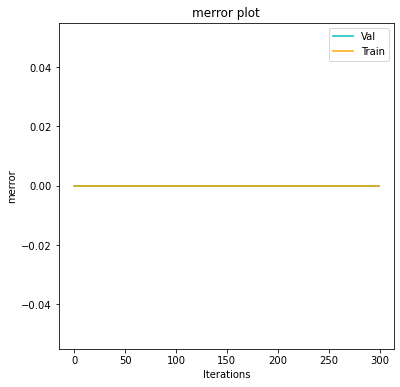

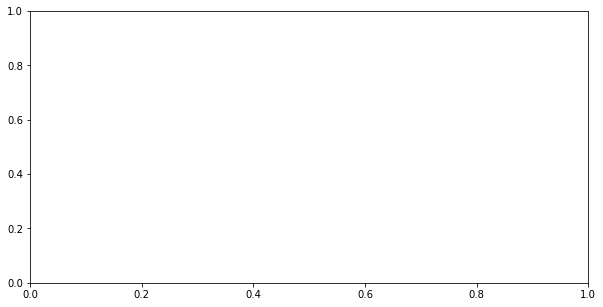

In [56]:
xgb2 = XGBClassifier(learning_rate=0.1,
                    n_estimators=500,
                    max_depth=3,
                    min_child_weight=1,
                    gamma=0,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective='multi:softmax',
                    nthread=4,
                    num_class=9,
                    seed=27)

fitXgb(xgb2, training_data)